Compare the following classification techniques:
    
    
    1). KNN
     
     2). Logistic regression
     
     3). DT
     4). Random Forest
    
Plot accuracies against each technique .Also Plot time taken for each

    Dataset to be used:, Make_blobs ,titanic 
    

In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [50]:
ds = pd.read_csv('/home/chintan/Class_Code/Class_6/titanic.csv')
ds.info()
print ds.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
(891, 12)


In [51]:
cols_to_drop = [
    'PassengerId',
    'Name',
    'Ticket',
    'Cabin',
    'Embarked',
]

df = ds.drop(cols_to_drop, axis=1)
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [52]:
def convert_sex_to_num(s):
    if s=='male':
        return 0
    elif s=='female':
        return 1
    else:
        return s

df.Sex = df.Sex.map(convert_sex_to_num) #df.Sex.map(arg, na_action=None) Argumen tis any dict, or fucntion
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [53]:
data = df.dropna() #it will drop entire row in which NAn occur that will help to make data more uniform but in this method accuracy will decreases but simplicity increases
print data.head(),data.shape

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    0  22.0      1      0   7.2500
1         1       1    1  38.0      1      0  71.2833
2         1       3    1  26.0      0      0   7.9250
3         1       1    1  35.0      1      0  53.1000
4         0       3    0  35.0      0      0   8.0500 (714, 7)


In [54]:
input_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
out_cols = ['Survived']

X = data[input_cols] #here X conatin the shape (714,6)
y = data[out_cols]   #Y contain only one column data(714,1)

#X.head()
print X.shape, y.shape

(714, 6) (714, 1)


In [55]:
#print data.head()

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle= True)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(478, 6)
(236, 6)
(478, 1)
(236, 1)


In [58]:
acc=[]
tim=[]

In [59]:
from sklearn.neighbors import KNeighborsClassifier
import time

In [60]:
a= time.time()

kc= KNeighborsClassifier()
kc.fit(X_train,y_train)
b= time.time()-a
a5=kc.score(X_test,y_test)
acc.append(a5)
print a5
tim.append(b)

0.690677966101695


/home/chintan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [62]:

a=time.time()
dd= DecisionTreeClassifier()
dd.fit(X_train,y_train)
b=time.time()-a
a1=dd.score(X_test,y_test)
acc.append(a1)
print a1
tim.append(b)

0.7627118644067796


In [63]:
a=time.time()
rr=RandomForestClassifier()
rr.fit(X_train,y_train)
b=time.time()-a
a2=rr.score(X_test,y_test)
acc.append(a2)
print a2
tim.append(b)

0.7838983050847458


/home/chintan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
a= time.time()
from sklearn.linear_model import LinearRegression
ll= LinearRegression()
ll.fit(X_train,y_train)
b= time.time()-a
a3=ll.score(X_test,y_test)
acc.append(a3)
print a3
tim.append(b)

0.35066226529258193


In [65]:
a=time.time()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
b=time.time()-a
a4=lr.score(X_test,y_test)
acc.append(a4)
print a4
tim.append(b)

0.7754237288135594


5 5


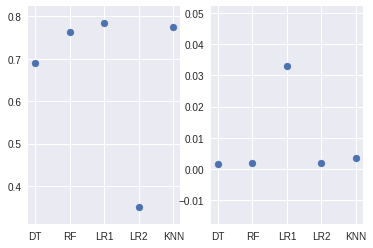

In [66]:
plt.figure(0)
plt.subplot(1,2,1)
X_label=["DT","RF","LR1","LR2","KNN"]
print len(X_label),len(acc)
sns.plt.scatter(X_label,acc)
plt.subplot(1,2,2)
sns.plt.scatter(X_label,tim)